# Maquina de Soporte Vectorial (SVM)

El SVM (Support Vector Machine o Máquina de Vectores de Soporte) es un algoritmo de aprendizaje supervisado utilizado principalmente para problemas de clasificación y regresión.El objetivo de una SVM es encontrar la "mejor" línea o hiperplano que separe los datos en diferentes clases, maximizando la distancia entre los puntos de datos más cercanos de cada clase (los vectores de soporte) y el hiperplano de decisión. Este proceso permite que el modelo generalice bien a datos no vistos.
SVM puede manejar problemas de clasificación no lineales mediante el uso de funciones de kernel, que permiten transformar los datos a un espacio de mayor dimensión donde pueden ser separables linealmente.
El kernel SVC (Support Vector Classification): Se utiliza para problemas de clasificación binaria como lo es el caso de clasificacion de compuestos con propiedades Geroprotectoras o no geroprotectoras.

Explicación:

Preparación de Datos: Se cargan y preparan los datos de la misma manera que antes.

Modelo SVM: Se crea un modelo SVM con un kernel lineal.

Entrenamiento: Se entrena el modelo con los datos de entrenamiento.

Predicción: Se realizan predicciones sobre todo el conjunto de datos.

Evaluación: Se calcula la precisión y se genera la matriz de confusión.

Resultados: Los resultados se guardan en un archivo CSV y se visualiza la matriz de confusión.

In [ ]:
# Instalar librerías necesarias (Solo ejecutar si no están instaladas)
from IPython.utils import io
import tqdm.notebook

total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
        # Instalar rdkit
        !pip -q install rdkit.pypi==2021.9.4
        pbar.update(20)
        # Instalar Pillow
        !pip -q install Pillow
        pbar.update(40)
        # Instalar molplotly
        !pip install molplotly
        pbar.update(60)
        # Instalar jupyter-dash
        !pip install jupyter-dash
        pbar.update(80)
        # Instalar el diseño de aplicación dash
        !pip install dash-bootstrap-components
        pbar.update(100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [1]:
# Importar librerías
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set de Datos

Partimnos de un set de datos que contiene 206 compuestos geroprotectores obtenidos de geroprotectors.org y 199 compuestos con etiqueta de toxicos obtenidos de ChEMBL por medio de API.
Para el modelo de Machine Learning se usara de la siguiente manera, los datos fueron binados y ordenados en datos de prueba y entrenamiento.

0= compuestos NO geroprotectores (prueba)

1= compuestos geroprotectores con pruebas experimentales (test)

In [2]:
# Leer bases de datos
datos = "/content/drive/MyDrive/INGER/ETAPA 2024/Version Final/0. Data Set/Concatenadas.csv"
datos = pd.read_csv(datos)

In [3]:
# Agregar una columna de índices
datos['Index'] = datos.index

In [4]:
# Información del dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       405 non-null    object 
 1   Total Molweight            405 non-null    float64
 2   Monoisotopic Mass          405 non-null    float64
 3   cLogP                      405 non-null    float64
 4   cLogS                      405 non-null    float64
 5   H-Acceptors                405 non-null    int64  
 6   H-Donors                   405 non-null    int64  
 7   Total Surface Area         405 non-null    float64
 8   Relative PSA               405 non-null    float64
 9   Polar Surface Area         405 non-null    float64
 10  Druglikeness               405 non-null    float64
 11  Shape Index                405 non-null    float64
 12  Molecular Flexibility      405 non-null    float64
 13  Molecular Complexity       405 non-null    float64

In [5]:
# Separar las columnas de las variables predictorias (X) de la columna que contiene la variable a predecir (Y)
columnas_interes = [1, 3, 5, 6, 7, 8, 20]
X = datos.iloc[:, columnas_interes]
y = datos.iloc[:, 44]

In [6]:
# Separar datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


#Creacion del modelo de svc con kernel lineal

 Este kernel es útil cuando los datos son linealmente separables, es decir, cuando se puede trazar una línea (o un hiperplano en dimensiones superiores) que divide las clases de manera efectiva.

Parámetros clave

C: Este parámetro controla la regularización del modelo. Un valor alto de
C

C intenta clasificar todos los puntos de entrenamiento correctamente, lo que puede llevar a un sobreajuste. Un valor bajo permite más errores en la clasificación, lo que puede resultar en un modelo más generalizado.

Kernel: Al establecer kernel='linear', se indica que se utilizará una función de kernel lineal, que se basa en el producto escalar de los vectores de entrada.



In [7]:
# Crear el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)

In [8]:
# Entrenar el modelo
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [9]:
# Predecir la respuesta en base a las etiquetas
y_pred_all = svm_model.predict(X)

In [10]:
# Crear un nuevo dataframe con todos los resultados
resultados_svm = datos.copy()
resultados_svm['Prediction'] = y_pred_all

In [11]:
# Mostrar los resultados
resultados_svm

,Name,Total Molweight,Monoisotopic Mass,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Relative PSA,Polar Surface Area,...,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,Geroprotectors,DataSet,Smile,Index,Prediction
0,"(R,R)-Cis-Diethyl Tetrahydro-2,8-Chrysenediol",320.431,320.177630,4.8318,-4.116,2,2,246.20,0.106420,40.46,...,0,0,0,0,0,1,Geroprotectors,CC[C@@H]1CC2=C(C=CC(=C2)O)C3=C1C4=C(C[C@H]3CC)...,0,1
1,"1,2,3,4,6-Penta-O-Galloyl-B-D-Glucose",940.679,940.118190,1.8357,-3.209,26,15,619.06,0.519660,444.18,...,0,0,0,0,0,1,Geroprotectors,Oc1cc(cc(O)c1O)C(=O)OC[C@H]1O[C@@H](OC(=O)c2cc...,1,1
2,10-Hydroxy-2-Decenoic Acid,186.250,186.125595,2.1572,-1.884,3,2,166.77,0.235290,57.53,...,0,0,0,0,1,1,Geroprotectors,C(CCC/C=C/C(=O)O)CCCO,2,0
3,1400W,177.250,177.126597,-0.1475,-1.874,3,2,153.05,0.274750,64.40,...,1,0,0,2,0,1,Geroprotectors,CC(=NCC1=CC=CC(=C1)CN)N,3,1
4,17-A-Estradiol,272.387,272.177630,3.8766,-4.020,2,2,200.69,0.130550,40.46,...,0,0,0,0,0,1,Geroprotectors,[H][C@]12CC[C@]3(C)[C@H](O)CC[C@@]3([H])[C@]1(...,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Tolcapone,273.243,273.063724,1.5205,-3.928,6,2,199.40,0.349350,103.35,...,0,0,0,0,0,0,NoGeroprotectors,CC1=CC=C(C=C1)C(=O)C2=CC(=C(C(=C2)O)O)[N+](=O)...,400,0
401,Acridine Orange,265.359,265.157897,3.0853,-3.895,3,0,210.86,0.085697,19.37,...,0,2,1,0,0,0,NoGeroprotectors,CN(C)C1=CC2=C(C=C1)C=C3C=CC(=CC3=N2)N(C)C,401,0
402,Aflatoxins,312.276,312.063390,1.6346,-3.266,6,0,208.96,0.316230,71.06,...,0,0,0,0,0,0,NoGeroprotectors,COC1=C2C3=C(C(=O)CC3)C(=O)OC2=C4C5C=COC5OC4=C1,402,0
403,Diethylstilbestrol,268.355,268.146330,4.5248,-3.158,2,2,220.68,0.118720,40.46,...,0,0,0,0,0,0,NoGeroprotectors,CCC(=C(CC)C1=CC=C(C=C1)O)C2=CC=C(C=C2)O,403,0


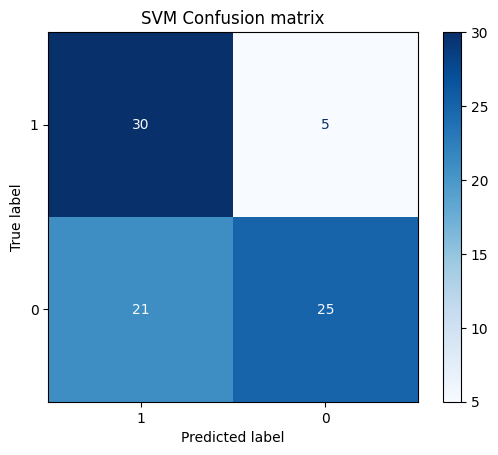

In [35]:
# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, svm_model.predict(X_test))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=list(map(str, y.unique())))
disp.plot(cmap=plt.cm.Blues)
plt.title('SVM Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

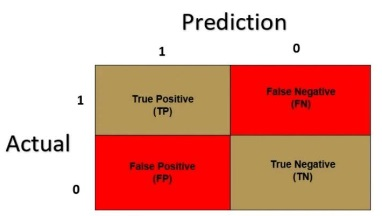

In [13]:
tp = 30
fp = 21
fn = 5
tn = 25


In [14]:
# Mostrar la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, svm_model.predict(X_test))
print("Accuracy:", accuracy)

Accuracy: 0.6790123456790124


In [15]:
from sklearn.metrics import confusion_matrix
# Calculate the specificity score
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.5434782608695652


In [16]:
# valor de kappa
from sklearn.metrics import confusion_matrix

# Cálculo de P_o
P_o = (tp + tn) / (tp + tn + fp + fn)

# Cálculo de P_e
P_e = ((tp + fp) / (tp + tn + fp + fn)) * ((tp + fn) / (tp + tn + fp + fn)) + \
       ((tn + fn) / (tp + tn + fp + fn)) * ((tn + fp) / (tp + tn + fp + fn))

# Cálculo de Kappa
kappa = (P_o - P_e) / (1 - P_e)

print("Kappa:", kappa)

Kappa: 0.37985865724381634


In [ ]:
# Guardar los resultados en un archivo CSV
#resultados_svm.to_csv('resultados_svm.csv', index=False)

1. Visualización de la Frontera de Decisión
Si tienes solo dos características (dimensiones) en tus datos, puedes visualizar la frontera de decisión que el modelo SVM está creando. Aquí hay un ejemplo de cómo hacerlo:

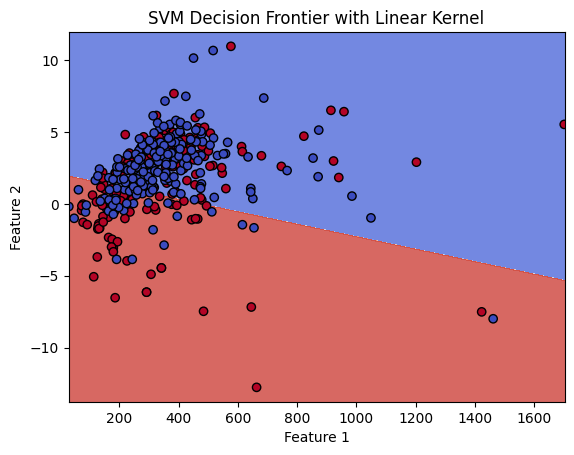

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar dos características para la visualización
X_vis = X.iloc[:, [0, 1]].values  # Cambia los índices según las características que quieras visualizar
y_vis = y.values

# Separar en entrenamiento y prueba
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, train_size=0.8, random_state=42)

# Crear y entrenar el modelo SVM con kernel lineal
svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis, y_train_vis)

# Crear una malla de puntos para visualizar la frontera de decisión
xx, yy = np.meshgrid(np.arange(X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1, 0.02),
                     np.arange(X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1, 0.02))

Z = svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Frontier with Linear Kernel')
plt.show()


mejoramienro de la visualizacion

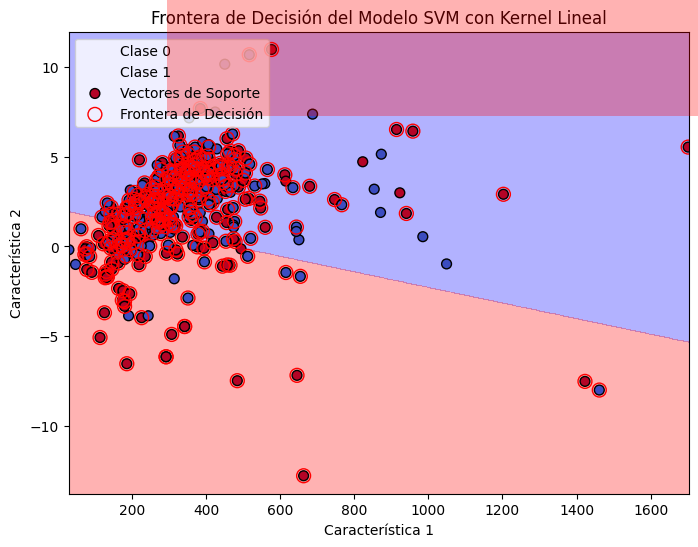

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Seleccionar dos características para la visualización
X_vis = X.iloc[:, [0, 1]].values  # Cambia los índices según las características que quieras visualizar
y_vis = y.values

# Separar en entrenamiento y prueba
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, train_size=0.8, random_state=42)

# Crear y entrenar el modelo SVM con kernel lineal
svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis, y_train_vis)

# Crear una malla de puntos para visualizar la frontera de decisión
xx, yy = np.meshgrid(np.arange(X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1, 0.02),
                     np.arange(X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1, 0.02))

Z = svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'red'])
plt.scatter(X_vis[:, 0], X_vis[:, 1], s=50, c=y_vis, edgecolor='k', cmap=plt.cm.coolwarm)

# Dibujar los vectores de soporte
sv_indices = svm_model_vis.support_
sv = X_vis[sv_indices]
sv_labels = y_vis[sv_indices]
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='r')

# Agregar etiquetas y leyenda
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Frontera de Decisión del Modelo SVM con Kernel Lineal')
plt.legend(['Clase 0', 'Clase 1', 'Vectores de Soporte', 'Frontera de Decisión'], loc='upper left')

plt.show()

#Predicciones

De los datos obtenidos en coconut data base.

COCONUT es una plataforma dedicada a recopilar y proporcionar información sobre propiedades, aplicaciones, beneficios para la salud de productos naturales. Esta base de datos cuenta con mas de 400 mil compuestos.

In [18]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np

In [19]:
# Cargar la base de datos COCONUT
coconut_data = pd.read_csv("/content/drive/MyDrive/INGER/ETAPA 2024/DATA /COCONUT_DesMol.csv")

In [20]:
coconut_data.dropna(inplace=True)

In [21]:
# Preprocesar los datos de COCONUT con las columnas de interes
columnas_interes = [5, 8, 10, 11, 12, 13, 25]
X_new = coconut_data.iloc[:, columnas_interes]

In [22]:
# Realizar predicciones
y_pred_new = svm_model.predict(X_new)

In [23]:
# Agregar las predicciones al DataFrame
coconut_data['Prediction'] = y_pred_new

In [24]:
# Guardar los resultados en un nuevo archivo CSV
#coconut_data.to_csv("COCONUT_prediccion_SVM.csv", index=False)

In [25]:
# Analizar los resultados
# Por ejemplo, puedes contar cuántos compuestos se predicen como activos o inactivos
print(coconut_data['Prediction'].value_counts())

Prediction
0    234060
1    130490
Name: count, dtype: int64


In [26]:
# Mostrar las primeras filas de los resultados
coconut_data.head()

,Structure [idcode],Molecule Name,coconut_id,SMILES,name,Total Molweight,Molweight,Monoisotopic Mass,cLogP,cLogS,...,Non-Aromatic Hetero-Rings,Hetero-Aromatic Rings,Amides,Amines,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,Prediction
0,ffk@p@@HdEM\bbTTTtbrbtMNLEkw`qRuUUUUTsUP@Oxaq`...,Compound 1,CNP0000001,O=C1OC2C(C(=C)C)CC1C3(O)CC4OC54C(=O)OC[CH]253C,Picrotoxinin,308.329,308.329,308.125990,-0.1819,-2.231,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,ek_TOH@DEVNCGHlbekhTZY]SP@cHdhhmhhheLiddiEEEhc...,Compound 2,CNP0000002,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,5-{6-[(acetyloxy)methyl]-3-hydroxy-4-[(5-hydro...,660.648,660.648,660.183643,-2.4498,-2.574,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,ecTpE@@@DIOLk`\VQ\bbTTTTTTRrbnvbTRtRRabwAfbPUQ...,Compound 3,CNP0000003,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,"20,30-dihydroxy-5,9,12,25-tetramethoxy-27-meth...",598.602,598.602,598.183900,4.1740,-7.354,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ei_PI@@@DIOLk`\^\bbTTTTTTRrbnvbTRtRRLxLtRBjJZv...,Compound 4,CNP0000004,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,"9,20,30-trihydroxy-5,25-dimethoxy-27-methyl-22...",554.549,554.549,554.157685,3.9683,-7.022,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,enUPF@@@DMBod\bbTTRTTVRVbffbjRvfdT|lbRr^AZ`hJh...,Compound 5,CNP0000005,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,"5-(benzoyloxy)-7-{2-[(2,2-dimethylpropanoyl)ox...",534.690,534.690,534.298140,7.2444,-6.642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [33]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
# Nota: Usamos probability=True para obtener probabilidades
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Obtener las probabilidades de predicción para la clase positiva
y_scores = svm_model.predict_proba(X_test)[:, 1]



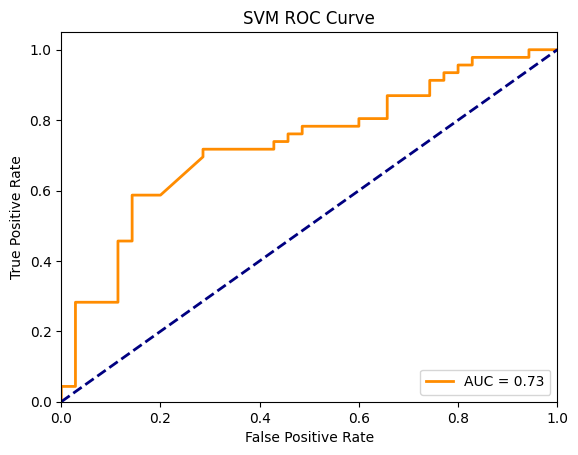

In [34]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()